<a href="https://colab.research.google.com/github/MohanZhu0623/Sentiment_Analysis/blob/main/Apply_model_to_data_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
model_path = '/content/drive/My Drive/trained_roberta_model'

In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [7]:
def predict_single(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=-1).item()
    return predicted_class_id


In [11]:
text = "Publishing and creating unique poems to bring awareness to the creative work and artistry involved with writing poetry."
prediction = predict_single(text, model, tokenizer)
print("Predicted class:", prediction)

Predicted class: 1


In [8]:
def predict_batch(texts, model, tokenizer, batch_size=16):
    all_predictions = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        logits = outputs.logits
        predicted_class_ids = torch.argmax(logits, dim=-1).cpu().numpy()
        all_predictions.extend(predicted_class_ids)
    return all_predictions

In [13]:
import pandas as pd
df = pd.read_excel('/content/kickstarter_data_sampled(1-5000).xlsx')

In [14]:
texts = df['blurb'].tolist()

In [15]:
predictions = predict_batch(texts, model, tokenizer)

In [16]:
df['sentiment'] = [pred - 1 for pred in predictions]

In [21]:
print(df['sentiment'].value_counts())

sentiment
 1    2221
 0    1934
-1     845
Name: count, dtype: int64


In [22]:
output_path = '/content/drive/My Drive/kickstarter_data_sampled_sentiment.xlsx'
df.to_excel(output_path, index=False)

In [ ]:
from google.colab import files
files.download(output_path)

In [10]:
import pandas as pd
df = pd.read_excel('/content/kickstarter_data_sampled(5001-10000).xlsx')
texts = df['blurb'].tolist()

In [11]:
predictions = predict_batch(texts, model, tokenizer)

In [12]:
df['sentiment'] = [pred - 1 for pred in predictions]
print(df['sentiment'].value_counts())

sentiment
 1    2317
 0    1853
-1     830
Name: count, dtype: int64


In [13]:
output_path = '/content/drive/My Drive/kickstarter_data_sampled_sentiment.xlsx'
df.to_excel(output_path, index=False)

In [14]:
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
df = pd.read_excel('/content/kickstarter_data_sampled(10001-15000).xlsx')
texts = df['blurb'].tolist()

In [16]:
predictions = predict_batch(texts, model, tokenizer)

In [17]:
df['sentiment'] = [pred - 1 for pred in predictions]
print(df['sentiment'].value_counts())
output_path = '/content/drive/My Drive/kickstarter_data_sampled_sentiment.xlsx'
df.to_excel(output_path, index=False)
from google.colab import files
files.download(output_path)

sentiment
 1    2219
 0    1934
-1     847
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
df = pd.read_excel('/content/kickstarter_data_sampled(15001-20000).xlsx')
texts = df['blurb'].tolist()

In [22]:
predictions = predict_batch(texts, model, tokenizer)

In [23]:
df['sentiment'] = [pred - 1 for pred in predictions]
print(df['sentiment'].value_counts())
output_path = '/content/drive/My Drive/kickstarter_data_sampled_sentiment.xlsx'
df.to_excel(output_path, index=False)
from google.colab import files
files.download(output_path)

sentiment
 1    2269
 0    1912
-1     820
Name: count, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import re
import pandas as pd

# Define preprocessing function
def pre_process_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra spaces
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

# Load the Excel file
df = pd.read_excel('/content/kickstarter_data_sampled_sentiment(full).xlsx')

# Preprocess text and calculate word count for each row
df['processed_text'] = df['blurb'].apply(pre_process_text)
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

# Display the first few rows
print(df[['blurb', 'processed_text', 'word_count']].head())

# Save the result
output_path = '/content/processed_dataset_with_word_count.csv'
df.to_csv(output_path, index=False)

# Generate download link
from google.colab import files
files.download(output_path)


                                               blurb  \
0  My First Official Studio Album Titled " M??D "...   
1  A faster cross platform photo editor that lets...   
2                                  Its time to Grow!   
3  Help us build a secure crowd-sourced network o...   
4  Studio Cosplay is creating the first ever make...   

                                      processed_text  word_count  
0  my first official studio album titled md it wi...          20  
1  a faster cross platform photo editor that lets...          13  
2                                   its time to grow           4  
3  help us build a secure crowdsourced network of...          13  
4  studio cosplay is creating the first ever make...          18  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
file_path = '/content/kickstarter_data_sampled_sentiment&WC.xlsx'
df = pd.read_excel(file_path)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Number_of_Projects_in_Each_Category
category_counts = df['category'].value_counts()
print("number_of_each_category：")
print(category_counts)

number_of_each_category：
category
Music           2819
Film & Video    2604
Technology      2125
Art             2046
Publishing      2011
Food            1520
Games           1227
Fashion         1049
Comics           775
Design           729
web              713
Photography      675
Theater          576
Crafts           565
Journalism       380
Dance            186
Name: count, dtype: int64


<ipython-input-28-2619050275fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


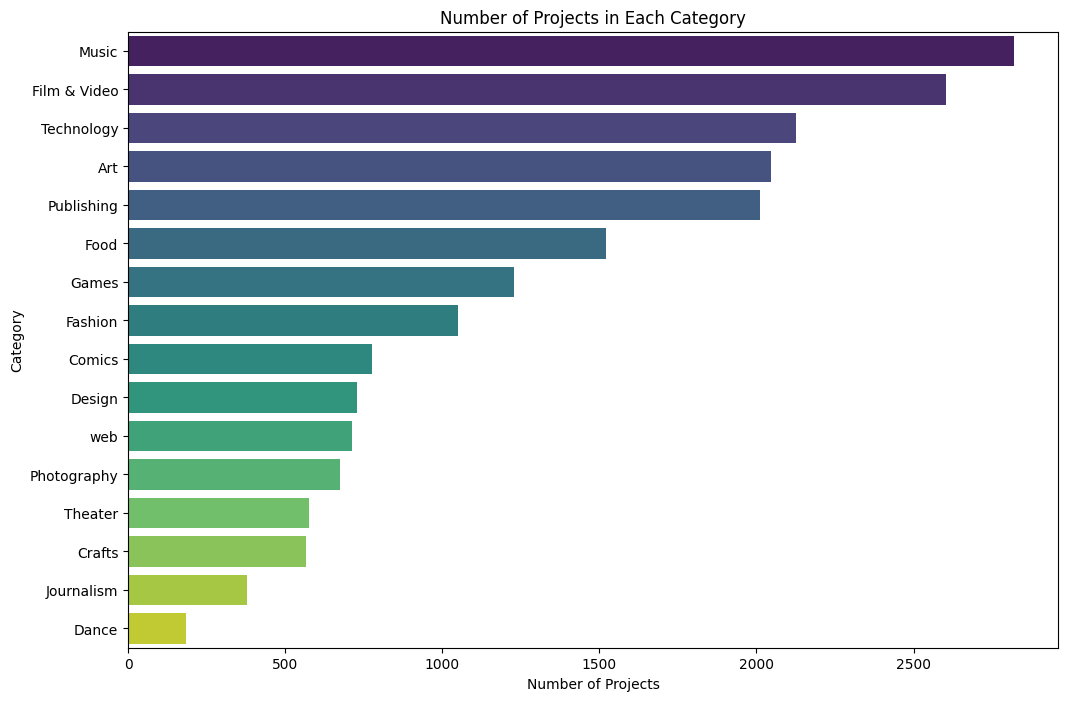

In [28]:
# Visualization_Number_of_Projects_in_Each_Category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Number of Projects in Each Category')
plt.xlabel('Number of Projects')
plt.ylabel('Category')
plt.show()

In [29]:
# each_category_state_successful_ratio
successful_counts = df[df['state'] == 'successful']['category'].value_counts()
total_counts = df['category'].value_counts()
successful_ratio = successful_counts / total_counts
successful_ratio = successful_ratio.fillna(0)

In [30]:
print("\neach_category_successful_ratio：")
print(successful_ratio)


each_category_successful_ratio：
category
Art             0.564027
Comics          0.878710
Crafts          0.269027
Dance           0.612903
Design          0.587106
Fashion         0.599619
Film & Video    0.636713
Food            0.282895
Games           0.671557
Journalism      0.228947
Music           0.688542
Photography     0.365926
Publishing      0.712581
Technology      0.401882
Theater         0.612847
web             0.969144
Name: count, dtype: float64


<ipython-input-31-6860b911e5cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=successful_ratio.values, y=successful_ratio.index, palette="viridis")


Text(0, 0.5, 'Category')

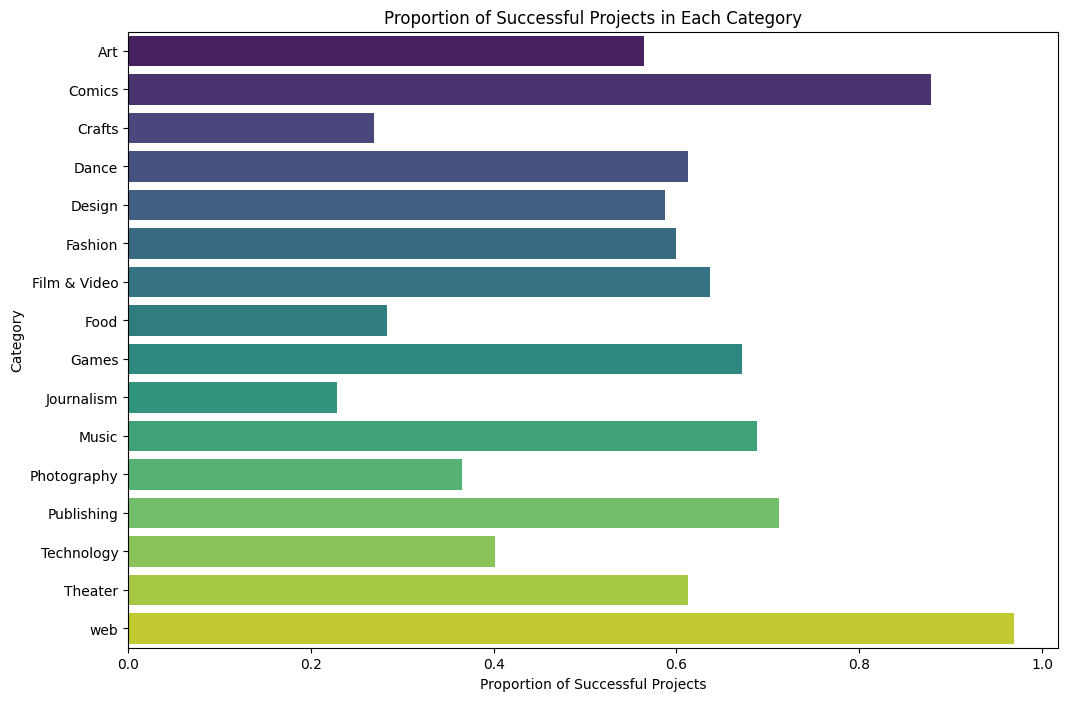

In [31]:
# Visualization_each_category_state_successful_ratio
plt.figure(figsize=(12, 8))
sns.barplot(x=successful_ratio.values, y=successful_ratio.index, palette="viridis")
plt.title('Proportion of Successful Projects in Each Category')
plt.xlabel('Proportion of Successful Projects')
plt.ylabel('Category')


In [32]:
# each_category_sentiment_proportion
sentiment_counts = df.groupby('category')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
sentiment_counts.columns = ['sentiment_-1', 'sentiment_0', 'sentiment_1']

print("\neach_category_pos_ratio：")
print(sentiment_counts['sentiment_1'])

print("\neach_category_neu_ratio：")
print(sentiment_counts['sentiment_0'])

print("\nneach_category_neg_ratio：")
print(sentiment_counts['sentiment_-1'])


each_category_pos_ratio：
category
Art             0.407136
Comics          0.158710
Crafts          0.720354
Dance           0.473118
Design          0.609053
Fashion         0.786463
Film & Video    0.154762
Food            0.752632
Games           0.458028
Journalism      0.360526
Music           0.493792
Photography     0.358519
Publishing      0.327200
Technology      0.584471
Theater         0.345486
web             0.458626
Name: sentiment_1, dtype: float64

each_category_neu_ratio：
category
Art             0.523460
Comics          0.341935
Crafts          0.263717
Dance           0.435484
Design          0.345679
Fashion         0.196378
Film & Video    0.256144
Food            0.235526
Games           0.379788
Journalism      0.478947
Music           0.470025
Photography     0.533333
Publishing      0.436101
Technology      0.397647
Theater         0.413194
web             0.408135
Name: sentiment_0, dtype: float64

neach_category_neg_ratio：
category
Art             0.069404
C

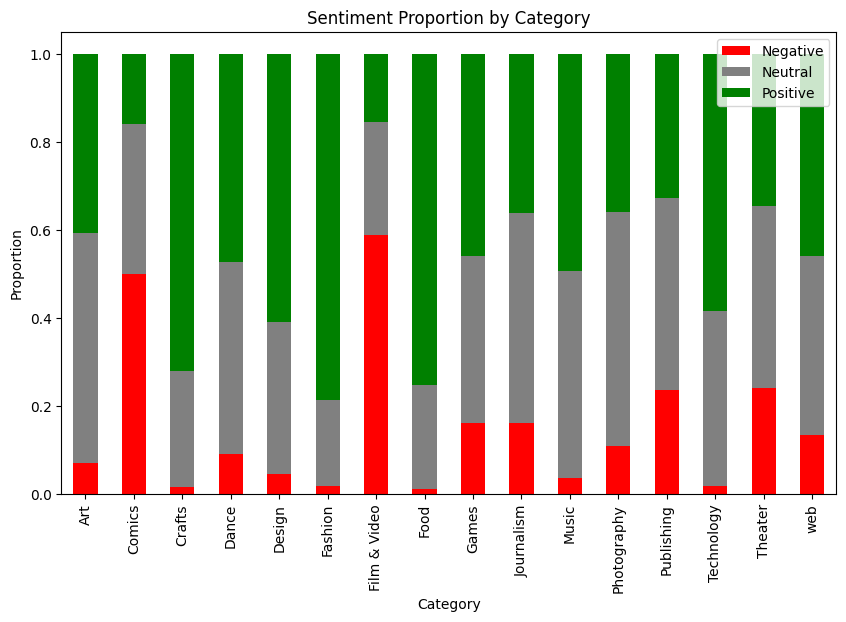

In [33]:
import matplotlib.pyplot as plt

# Visualization_each_category_sentiment_proportion
fig, ax = plt.subplots(figsize=(10, 6))

sentiment_counts.plot(kind='bar', stacked=True, ax=ax, color=['red', 'gray', 'green'])

ax.set_title('Sentiment Proportion by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Proportion')
ax.legend(['Negative', 'Neutral', 'Positive'], loc='upper right')

<ipython-input-35-e1f091e13826>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_word_count_mean.values, y=category_word_count_mean.index, palette="viridis")


Text(0, 0.5, 'Category')

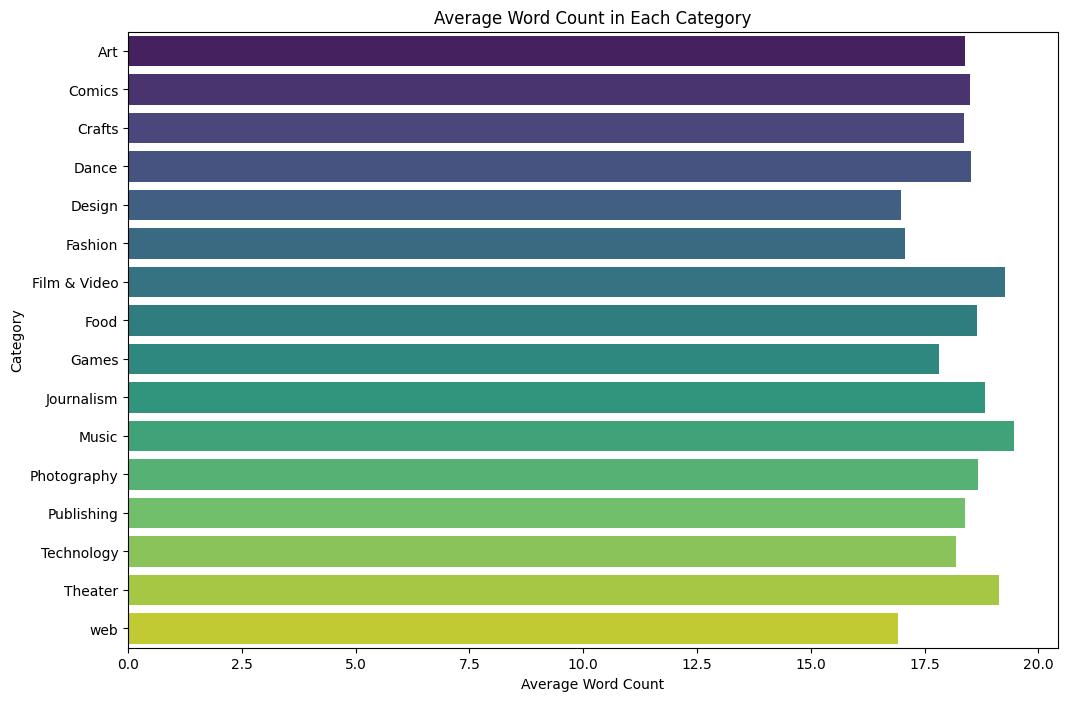

In [35]:
# Calculate the average word count for each category
category_word_count_mean = df.groupby('category')['word_count'].mean()

# Visualize the average word count for each category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_word_count_mean.values, y=category_word_count_mean.index, palette="viridis")
plt.title('Average Word Count in Each Category')
plt.xlabel('Average Word Count')
plt.ylabel('Category')

<ipython-input-36-aeb101ca6481>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_goal_mean.values, y=category_goal_mean.index, palette="viridis")


Text(0, 0.5, 'Category')

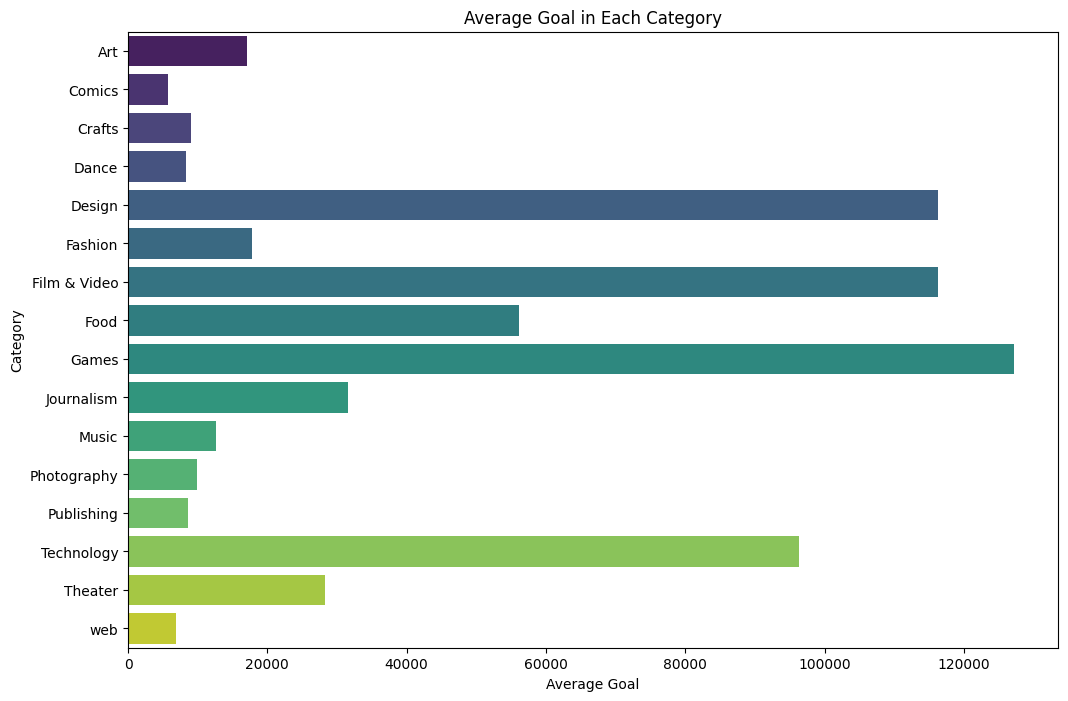

In [36]:
# Calculate the average goal for each category
category_goal_mean = df.groupby('category')['goal'].mean()

# Visualize the average goal for each category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_goal_mean.values, y=category_goal_mean.index, palette="viridis")
plt.title('Average Goal in Each Category')
plt.xlabel('Average Goal')
plt.ylabel('Category')

<ipython-input-37-040b7fe865a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_word_count_mean.index, y=state_word_count_mean.values, palette="viridis")


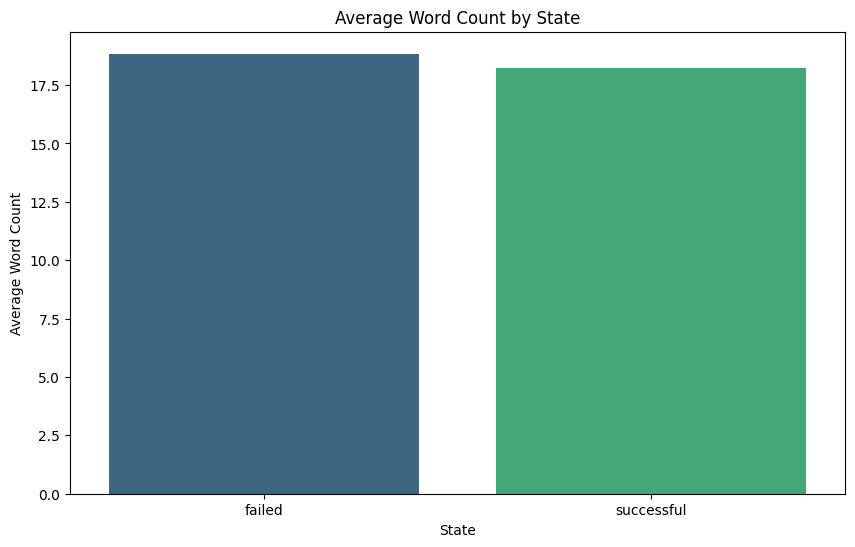

In [37]:
# Calculate the average word count for each state
state_word_count_mean = df.groupby('state')['word_count'].mean()

# Visualize the average word count for each state
plt.figure(figsize=(10, 6))
sns.barplot(x=state_word_count_mean.index, y=state_word_count_mean.values, palette="viridis")
plt.title('Average Word Count by State')
plt.xlabel('State')
plt.ylabel('Average Word Count')
plt.show()

<ipython-input-38-9b3a0360adb6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_goal_mean.index, y=state_goal_mean.values, palette="viridis")


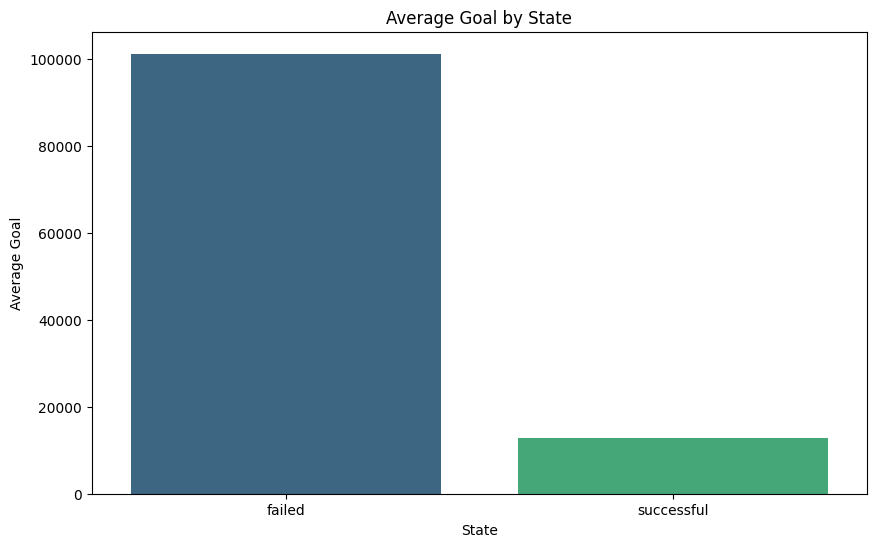

In [38]:
# Calculate the average goal for each state
state_goal_mean = df.groupby('state')['goal'].mean()

# Visualize the average goal for each state
plt.figure(figsize=(10, 6))
sns.barplot(x=state_goal_mean.index, y=state_goal_mean.values, palette="viridis")
plt.title('Average Goal by State')
plt.xlabel('State')
plt.ylabel('Average Goal')
plt.show()

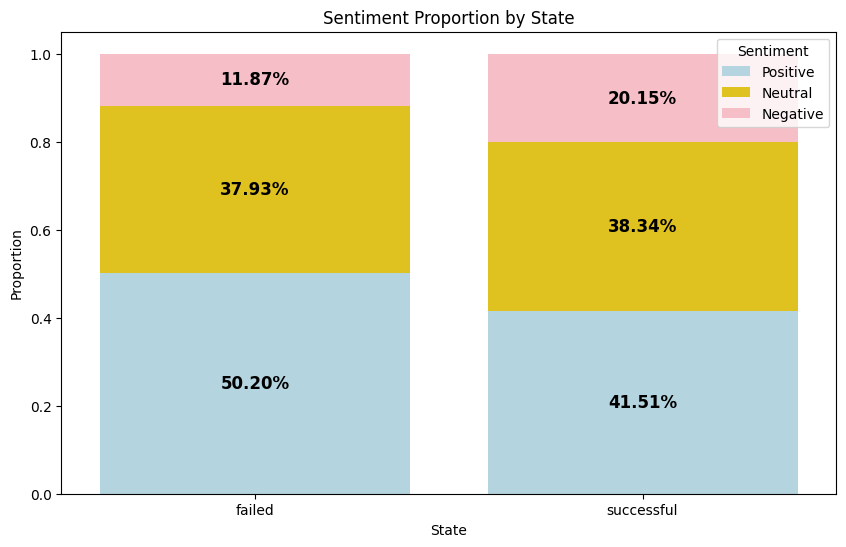

In [39]:
# Calculate sentiment proportion for each state
sentiment_counts_state = df.groupby('state')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
sentiment_counts_state.columns = ['sentiment_-1', 'sentiment_0', 'sentiment_1']

# Plot sentiment proportions for each state
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts_state.index, y=sentiment_counts_state['sentiment_1'], color='#ADD8E6', label='Positive')  # Light Blue
sns.barplot(x=sentiment_counts_state.index, y=sentiment_counts_state['sentiment_0'], color='#FFD700', label='Neutral', bottom=sentiment_counts_state['sentiment_1'])  # Light Yellow
sns.barplot(x=sentiment_counts_state.index, y=sentiment_counts_state['sentiment_-1'], color='#FFB6C1', label='Negative', bottom=sentiment_counts_state['sentiment_1'] + sentiment_counts_state['sentiment_0'])  # Light Pink

# Add percentage labels
for i in range(len(sentiment_counts_state)):
    total = sentiment_counts_state.iloc[i].sum()
    pos = sentiment_counts_state.iloc[i]['sentiment_1']
    neu = sentiment_counts_state.iloc[i]['sentiment_0']
    neg = sentiment_counts_state.iloc[i]['sentiment_-1']
    plt.text(i, pos / 2, f'{pos * 100:.2f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
    plt.text(i, pos + neu / 2, f'{neu * 100:.2f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
    plt.text(i, pos + neu + neg / 2, f'{neg * 100:.2f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

plt.title('Sentiment Proportion by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

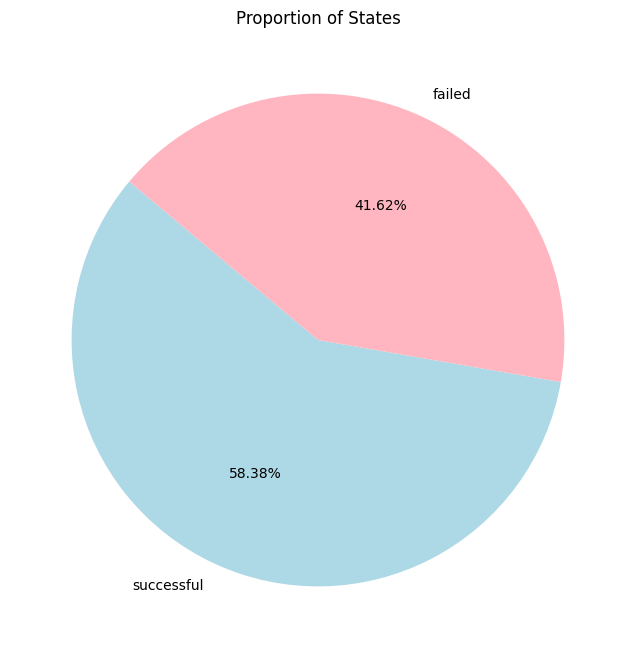

In [40]:
# Calculate the proportion of each state
state_counts = df['state'].value_counts(normalize=True)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.2f%%', colors=['#ADD8E6', '#FFB6C1'], startangle=140)
plt.title('Proportion of States')
plt.show()

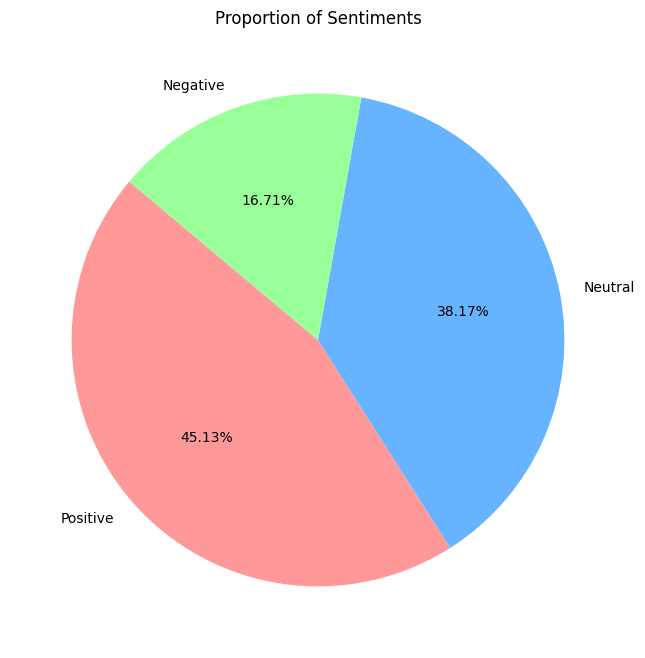

In [41]:
# Calculate the proportion of each sentiment
sentiment_counts = df['sentiment'].value_counts(normalize=True)

# Define the colors for each sentiment
colors = ['#FF9999', '#66B3FF', '#99FF99']  # Light Red for Negative, Light Blue for Neutral, Light Green for Positive

# Map the sentiment values to labels
labels = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
sentiment_labels = [labels[i] for i in sentiment_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.2f%%', colors=colors, startangle=140)
plt.title('Proportion of Sentiments')
plt.show()

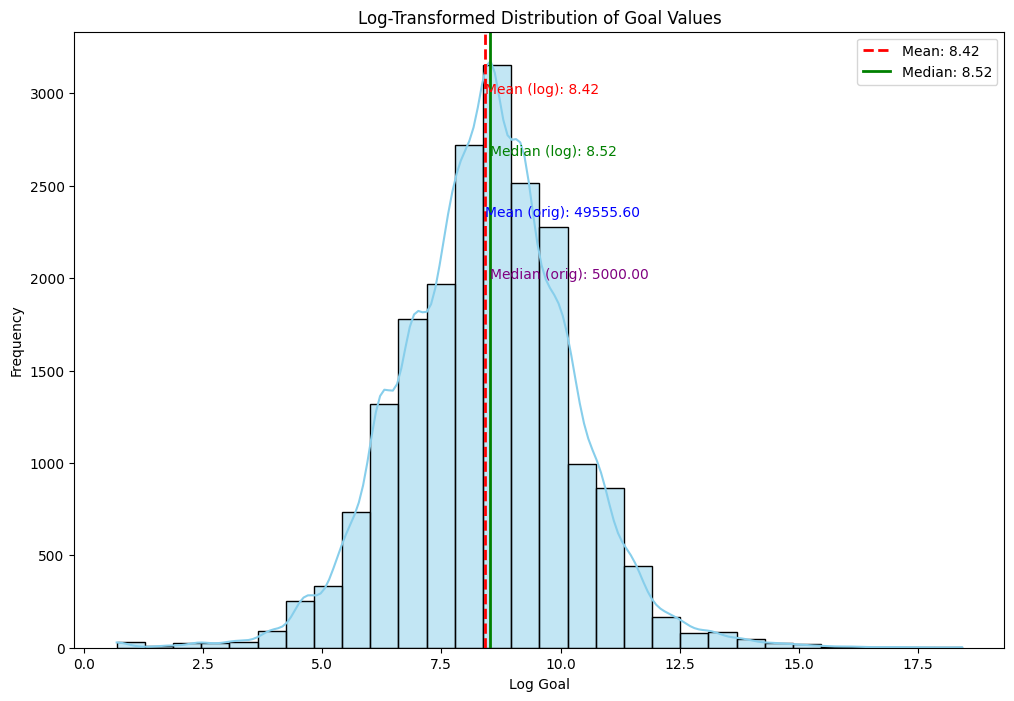

In [42]:
import numpy as np
# Calculate mean and median of original 'goal' column
mean_goal = df['goal'].mean()
median_goal = df['goal'].median()

# Apply log transformation to the 'goal' column
df['log_goal'] = np.log1p(df['goal'])  # 使用 log(1 + goal) 以避免 log(0) 的情况

# Calculate mean and median of the log-transformed 'goal'
mean_log_goal = df['log_goal'].mean()
median_log_goal = df['log_goal'].median()

# Plot the distribution of the log-transformed 'goal' column
plt.figure(figsize=(12, 8))
sns.histplot(df['log_goal'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_log_goal, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_log_goal:.2f}')
plt.axvline(median_log_goal, color='green', linestyle='-', linewidth=2, label=f'Median: {median_log_goal:.2f}')

# Annotate the mean and median on the plot
plt.text(mean_log_goal, plt.ylim()[1]*0.9, f'Mean (log): {mean_log_goal:.2f}', color='red', ha='left')
plt.text(median_log_goal, plt.ylim()[1]*0.8, f'Median (log): {median_log_goal:.2f}', color='green', ha='left')

# Annotate the original mean and median on the plot
plt.text(mean_log_goal, plt.ylim()[1]*0.7, f'Mean (orig): {mean_goal:.2f}', color='blue', ha='left')
plt.text(median_log_goal, plt.ylim()[1]*0.6, f'Median (orig): {median_goal:.2f}', color='purple', ha='left')

plt.title('Log-Transformed Distribution of Goal Values')
plt.xlabel('Log Goal')
plt.ylabel('Frequency')
plt.legend()
plt.show()

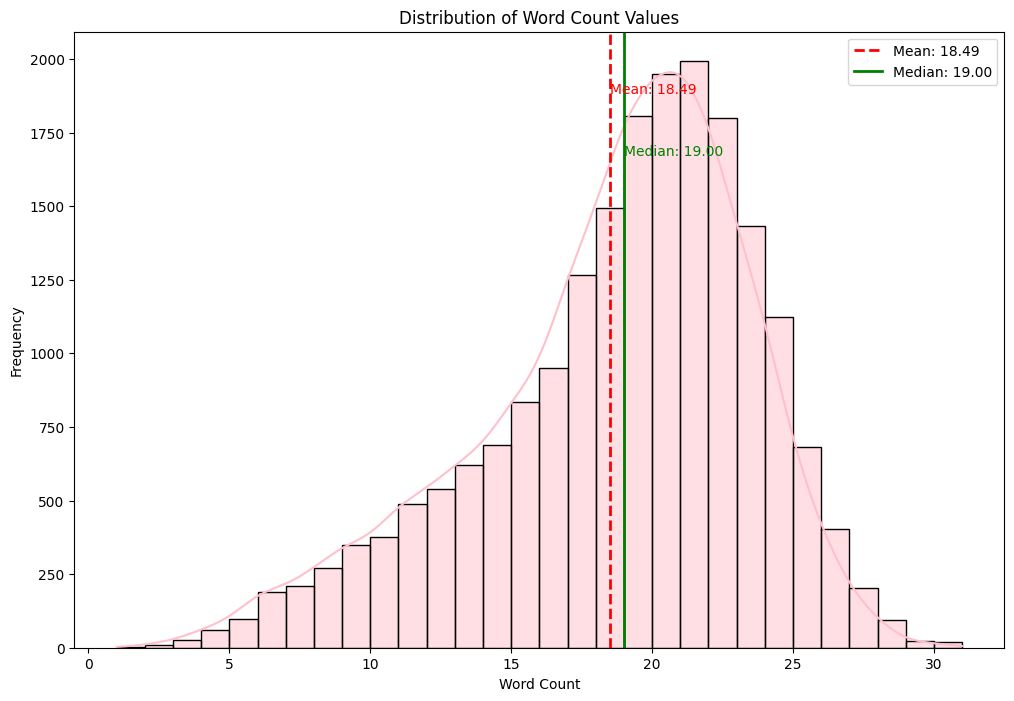

In [43]:
# Calculate mean and median of 'word_count' column
mean_word_count = df['word_count'].mean()
median_word_count = df['word_count'].median()

# Plot the distribution of the 'word_count' column
plt.figure(figsize=(12, 8))
sns.histplot(df['word_count'], bins=30, kde=True, color='pink')
plt.axvline(mean_word_count, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_word_count:.2f}')
plt.axvline(median_word_count, color='green', linestyle='-', linewidth=2, label=f'Median: {median_word_count:.2f}')

# Annotate the mean and median on the plot
plt.text(mean_word_count, plt.ylim()[1]*0.9, f'Mean: {mean_word_count:.2f}', color='red', ha='left')
plt.text(median_word_count, plt.ylim()[1]*0.8, f'Median: {median_word_count:.2f}', color='green', ha='left')

plt.title('Distribution of Word Count Values')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

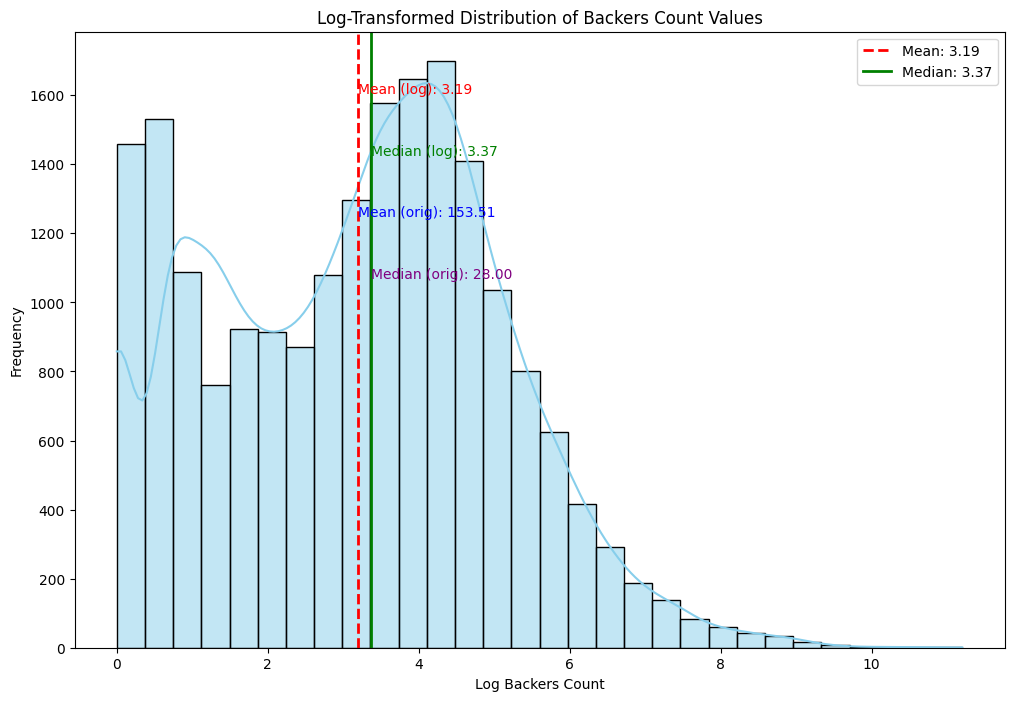

In [44]:
import numpy as np

mean_backers_count = df['backers_count'].mean()
median_backers_count = df['backers_count'].median()

df['log_backers_count'] = np.log1p(df['backers_count'])

mean_log_backers_count = df['log_backers_count'].mean()
median_log_backers_count = df['log_backers_count'].median()

plt.figure(figsize=(12, 8))
sns.histplot(df['log_backers_count'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_log_backers_count, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_log_backers_count:.2f}')
plt.axvline(median_log_backers_count, color='green', linestyle='-', linewidth=2, label=f'Median: {median_log_backers_count:.2f}')

# Annotate the mean and median on the plot
plt.text(mean_log_backers_count, plt.ylim()[1]*0.9, f'Mean (log): {mean_log_backers_count:.2f}', color='red', ha='left')
plt.text(median_log_backers_count, plt.ylim()[1]*0.8, f'Median (log): {median_log_backers_count:.2f}', color='green', ha='left')

# Annotate the original mean and median on the plot
plt.text(mean_log_backers_count, plt.ylim()[1]*0.7, f'Mean (orig): {mean_backers_count:.2f}', color='blue', ha='left')
plt.text(median_log_backers_count, plt.ylim()[1]*0.6, f'Median (orig): {median_backers_count:.2f}', color='purple', ha='left')

plt.title('Log-Transformed Distribution of Backers Count Values')
plt.xlabel('Log Backers Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

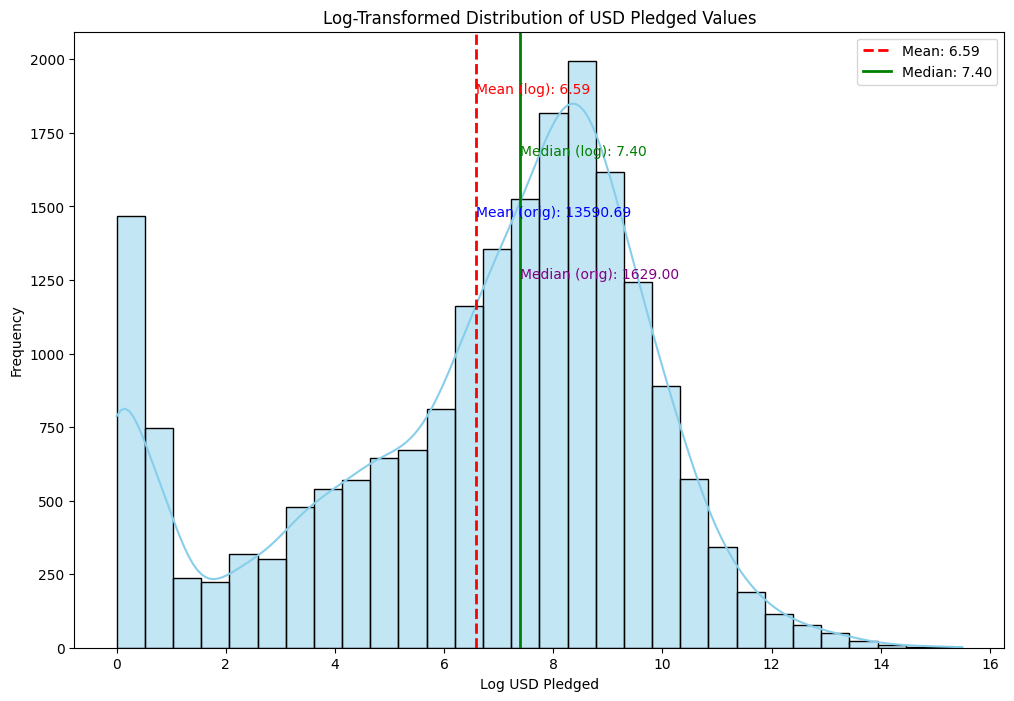

In [45]:
mean_usd_pledged = df['usd_pledged'].mean()
median_usd_pledged = df['usd_pledged'].median()

df['log_usd_pledged'] = np.log1p(df['usd_pledged'])

mean_log_usd_pledged = df['log_usd_pledged'].mean()
median_log_usd_pledged = df['log_usd_pledged'].median()

plt.figure(figsize=(12, 8))
sns.histplot(df['log_usd_pledged'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_log_usd_pledged, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_log_usd_pledged:.2f}')
plt.axvline(median_log_usd_pledged, color='green', linestyle='-', linewidth=2, label=f'Median: {median_log_usd_pledged:.2f}')

plt.text(mean_log_usd_pledged, plt.ylim()[1]*0.9, f'Mean (log): {mean_log_usd_pledged:.2f}', color='red', ha='left')
plt.text(median_log_usd_pledged, plt.ylim()[1]*0.8, f'Median (log): {median_log_usd_pledged:.2f}', color='green', ha='left')


plt.text(mean_log_usd_pledged, plt.ylim()[1]*0.7, f'Mean (orig): {mean_usd_pledged:.2f}', color='blue', ha='left')
plt.text(median_log_usd_pledged, plt.ylim()[1]*0.6, f'Median (orig): {median_usd_pledged:.2f}', color='purple', ha='left')

plt.title('Log-Transformed Distribution of USD Pledged Values')
plt.xlabel('Log USD Pledged')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [46]:
print(df.columns)

Index(['uid', 'kickstarter_id', 'backers_count', 'blurb', 'language',
       'country', 'country_displayable_name', 'unix_startdate',
       'published_date', 'unix_deadline', 'deadline_date', 'date_difference',
       'goal', 'state', 'usd_pledged', 'category', 'sentiment',
       'processed_text', 'word_count', 'log_goal', 'log_backers_count',
       'log_usd_pledged'],
      dtype='object')
